In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xlabel
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [2]:
df = pd.read_csv('CreditScoring.csv')

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
status_values = {
    1: 'ok', 2:'default', 0:'unk'
                 }

In [7]:
df.status = df.status.map(status_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

In [10]:
df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'part-time',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [11]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [12]:
df.income.max()

np.int64(99999999)

In [13]:
for c in ['income', 'assets', 'debt']:
    df[c]=df[c].replace(to_replace=99999999, value=np.nan)

In [14]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [15]:
df.describe().round(2)

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4421.00,4408.00,4437.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,130.57,5403.43,342.95,1039.02,1462.88
std,8.17,14.66,10.98,19.52,86.37,11573.16,1245.86,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3000.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,165.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,959.00,300000.00,30000.00,5000.00,11140.00


In [16]:
df = df[df.status!= 'unk'].reset_index()

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [20]:
del df_train['status']
del df_val['status']
del df_test['status']


In [21]:
def asses_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'part-time':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'


In [22]:
xi = df_train.iloc[0].to_dict()
asses_risk(xi)

'default'

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [24]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train.fillna(0).to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [25]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(X_val)

In [27]:
auc = roc_auc_score(y_val, y_pred[:,1])
auc

0.7550262128129233

In [28]:
y_pred_train = dt.predict_proba(X_train)[:,1]
auc_train = roc_auc_score(y_train, y_pred_train)
auc_train

0.8019140696640944

In [29]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- seniority <= 2.50
|   |--- records=no <= 0.50
|   |   |--- income <= 136.50
|   |   |   |--- age <= 54.00
|   |   |   |   |--- class: 1
|   |   |   |--- age >  54.00
|   |   |   |   |--- class: 0
|   |   |--- income >  136.50
|   |   |   |--- age <= 33.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  33.50
|   |   |   |   |--- class: 1
|   |--- records=no >  0.50
|   |   |--- job=fixed <= 0.50
|   |   |   |--- time <= 27.00
|   |   |   |   |--- class: 0
|   |   |   |--- time >  27.00
|   |   |   |   |--- class: 1
|   |   |--- job=fixed >  0.50
|   |   |   |--- income <= 46.00
|   |   |   |   |--- class: 1
|   |   |   |--- income >  46.00
|   |   |   |   |--- class: 0
|--- seniority >  2.50
|   |--- records=no <= 0.50
|   |   |--- assets <= 3450.00
|   |   |   |--- income <= 90.50
|   |   |   |   |--- class: 1
|   |   |   |--- income >  90.50
|   |   |   |   |--- class: 0
|   |   |--- assets >  3450.00
|   |   |   |--- home=private <= 0.50
|   |   |   |   |--- class: 0
|   

Decision Tree Learning Algorithm



In [30]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000,'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default'],
]
df_example = pd.DataFrame(data, columns=['assets', 'debt','status'])
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [31]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [32]:
T= 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_right.status.value_counts(normalize=True))
print(T)

,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
4000


In [33]:
for T in Ts:
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print(T)

,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
0


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64
3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64
5000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64
8000


In [34]:
thresholds = {

    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]

}


In [35]:
for feature, Ts in thresholds.items():
    print(feature)
    for T in Ts:
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print(T)


assets


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
0


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64
3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64
5000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64
8000
debt


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64
500


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64
1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64
2000


In [36]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print(d, auc)

1 0.6432674459439122
2 0.7128913108914865
3 0.7455663974313953
4 0.7550262128129233
5 0.7661102192344353
6 0.7581303617117343
10 0.6836715496914664
15 0.661353032659409
20 0.6579259268549641
None 0.6559097978227062


In [37]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in[ 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))
        print(d,s, auc)

4 2 0.7550262128129233
4 5 0.7552268850649676
4 10 0.7527686499774244
4 15 0.7619744895399589
4 20 0.7619744895399589
4 100 0.7624698991621933
4 200 0.7543113179150153
4 500 0.6974426829880098
5 2 0.7620873676817338
5 5 0.7656931972106557
5 10 0.7675117894948076
5 15 0.7716820097326043
5 20 0.7623382079967891
5 100 0.7689353082827474
5 200 0.7588546631214568
5 500 0.6974426829880098
6 2 0.7635108864696734
6 5 0.7699606180705363
6 10 0.7791382380976271
6 15 0.7849169718557166
6 20 0.7771001605378017
6 100 0.7700139216374855
6 200 0.7596259970902522
6 500 0.6974426829880098
7 2 0.7539131089148647
7 5 0.7455914814629008
7 10 0.7619901670596497
7 15 0.7740963477650129
7 20 0.766884688707169
7 100 0.7695435960467567
7 200 0.7596259970902522
7 500 0.6974426829880098
10 2 0.7038485175337379
10 5 0.7036196257462499
10 10 0.7332031054031004
10 15 0.7543865700095319
10 20 0.7560703356243416
10 100 0.7700139216374856
10 200 0.7596259970902522
10 500 0.6974426829880098
15 2 0.6783349219886621
15 5

In [38]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
best = df_scores[df_scores.auc == df_scores.auc.max()]
best

,max_depth,min_samples_leaf,auc
19,6.0,15,0.784917


In [39]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                                  columns='max_depth',
                                  values='auc')

<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

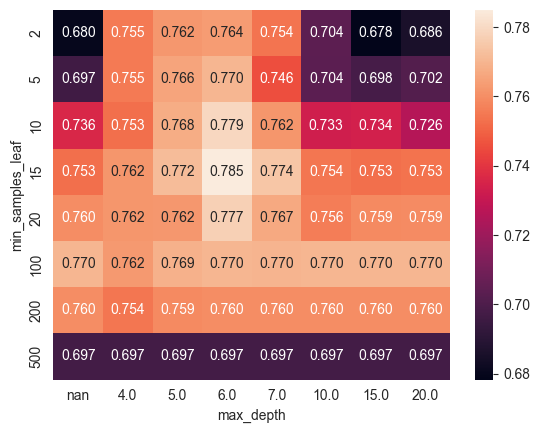

In [40]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [41]:
dt =DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)
auc = roc_auc_score(y_val, y_pred[:,1])
print(auc)


0.7847852806903125


Ensemble model

In [42]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print(auc)

0.7931602117092258


In [44]:
rf.predict_proba(X_val[[0]])

array([[0.4, 0.6]])

In [45]:
auc_scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    auc_scores.append((n, auc))
scores = pd.DataFrame(auc_scores, columns=['n_estimators', 'auc'])

In [46]:
scores

,n_estimators,auc
0,10,0.793160
1,20,0.802466
2,30,0.808145
3,40,0.808935
4,50,0.809932
5,60,0.811290
6,70,0.810926
7,80,0.810895
8,90,0.812001
9,100,0.813274


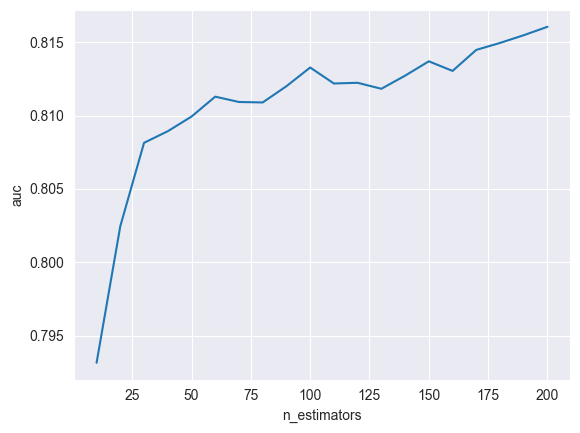

In [47]:
plt.plot(scores['n_estimators'], scores['auc'])
xlabel='n_estimators'
ylabel='auc'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()


Depth Parameters fine tuning

In [48]:
n= 100
auc_scores = []
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(max_depth=d, n_estimators=n, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        auc_scores.append((n,d, auc))
auc_scores = pd.DataFrame(auc_scores, columns=['n_estimators', 'max_depth', 'auc'])

In [49]:
auc_scores[auc_scores['auc'] == auc_scores['auc'].max()]

,n_estimators,max_depth,auc
39,200,10,0.827779


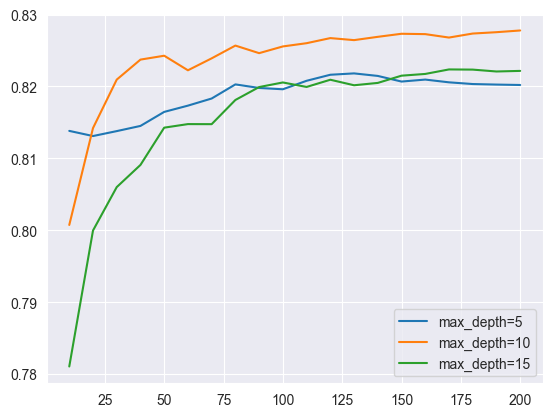

In [50]:
for d in [5, 10, 15]:
    df_subset = auc_scores[auc_scores.max_depth == d]
    plt.plot(df_subset['n_estimators'], df_subset['auc'], label=f'max_depth={d}')
plt.legend()

In [51]:
max_depth = 10
auc_scores = []
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(max_depth=max_depth, n_estimators=n, min_samples_leaf=s, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        auc_scores.append((n,d,s, auc))
auc_scores = pd.DataFrame(auc_scores, columns=['n_estimators', 'max_depth','min_samples_leaf', 'auc'])

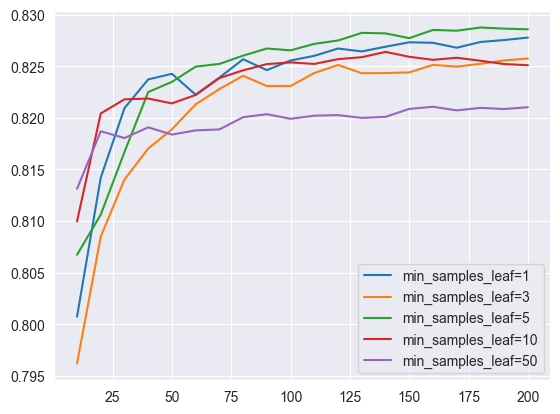

In [52]:
for s in [1, 3, 5, 10, 50]:
    df_subset = auc_scores[auc_scores.min_samples_leaf == s]
    plt.plot(df_subset['n_estimators'], df_subset['auc'], label=f'min_samples_leaf={s}')
plt.legend()

In [53]:
min_sample_leaf = 5
rf = RandomForestClassifier(max_depth=10, n_estimators=n, min_samples_leaf=min_sample_leaf, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)


Gradient Boosting
1. Tune ETA first
2. Then MAX_DEPTH
3. Then MIN_CHILD_WEIGHT

In [54]:
features = dv.get_feature_names_out().astype(str).tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)

In [55]:
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [56]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',


    'verbosity': 1,
    'nthread': -1,

    'seed': 1,
    'n_jobs': -1,

}

model = xgb.train(xgb_params, dtrain, num_boost_round=10 )

In [57]:
y_pred = model.predict(dval)

roc_auc_score(y_val,y_pred)

0.817911879797321

In [69]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [70]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',


    'verbosity': 1,
    'nthread': -1,

    'seed': 1,
    'n_jobs': -1,

}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist )

In [71]:
def parse_xgb_output(output):
    results = []
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    df_results = pd.DataFrame(results, columns=['num_iter', 'auc_train', 'auc_val'])
    return df_results





In [72]:
df_score = parse_xgb_output(output)

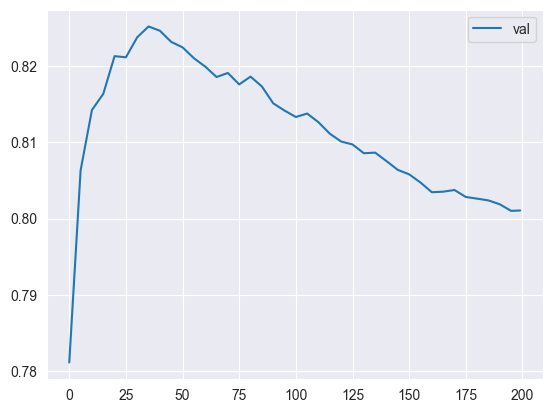

In [73]:
#plt.plot(df_score['num_iter'], df_score['auc_train'], label='train')
plt.plot(df_score['num_iter'], df_score['auc_val'], label='val')
plt.legend()

In [66]:
key = 'eta=%s' % (xgb_params['eta'])

In [76]:
scores[key] = parse_xgb_output(output)
key
scores.keys()

dict_keys(['eta=0.1'])

In [77]:
scores['eta=0.1']

,num_iter,auc_train,auc_val
0,0,0.86358,0.78118
1,5,0.91053,0.80630
2,10,0.92344,0.81420
3,15,0.93450,0.81631
4,20,0.94577,0.82125
5,25,0.95223,0.82110
6,30,0.95745,0.82372
7,35,0.96203,0.82513
8,40,0.96674,0.82457
9,45,0.97050,0.82311


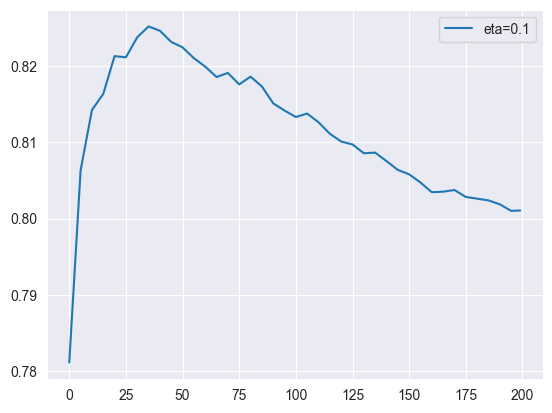

In [78]:
etas = [ 'eta=0.1']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score['num_iter'], df_score['auc_val'], label=eta)
plt.legend()

In [98]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',


    'verbosity': 1,
    'nthread': -1,

    'seed': 1,
    'n_jobs': -1,

}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist )

In [99]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key


'max_depth=3'

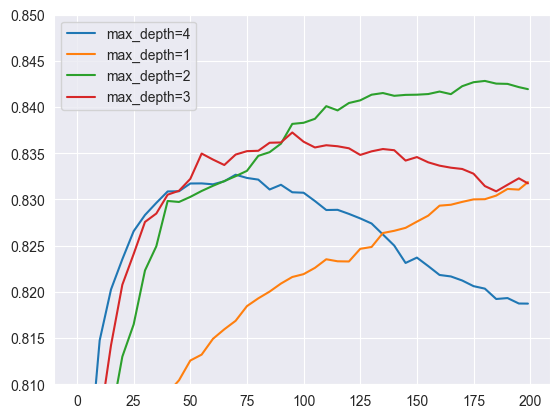

In [105]:
max_depths = [ 'max_depth=4', 'max_depth=1', 'max_depth=2', 'max_depth=3']

for max_depth in max_depths :
    df_score = scores[max_depth]
    plt.plot(df_score['num_iter'], df_score['auc_val'], label=max_depth)

plt.ylim(0.81, 0.85)
plt.legend()

In [145]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 2,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',


    'verbosity': 1,
    'nthread': -1,

    'seed': 1,
    'n_jobs': -1,

}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist )

In [146]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key


'min_child_weight=1'

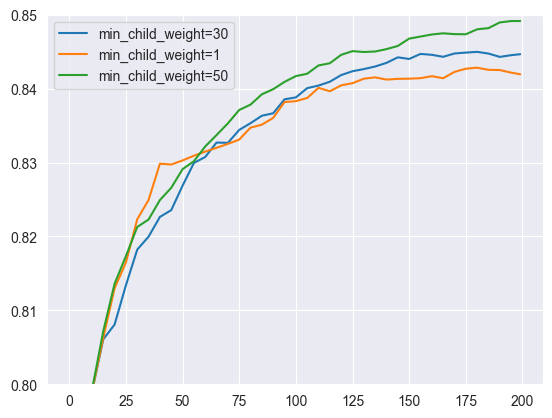

In [150]:
min_child_weights = [ 'min_child_weight=30', 'min_child_weight=1', 'min_child_weight=50']

for min_child_weight in min_child_weights :
    df_score = scores[min_child_weight]
    plt.plot(df_score['num_iter'], df_score['auc_val'], label=min_child_weight)

plt.ylim(0.8, 0.85)
plt.legend()

In [154]:

xgb_params = {
    'eta': 0.1,
    'max_depth': 2,
    'min_child_weight': 50,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',


    'verbosity': 1,
    'nthread': -1,

    'seed': 1,
    'n_jobs': -1,

}

model = xgb.train(xgb_params, dtrain, num_boost_round=175 )

In [155]:
dt =DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [156]:
min_sample_leaf = 5
rf = RandomForestClassifier(max_depth=10, n_estimators=200, min_samples_leaf=3, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [158]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7851145086038228

In [159]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8285819996989916

In [163]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8472664676666835

In [168]:
y_full_train = (df_full_train.status == 'default').astype(int).values
del df_full_train['status']


AttributeError: 'DataFrame' object has no attribute 'status'

In [167]:
dicts_full_train = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [169]:
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [174]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv.get_feature_names_out().astype(str).tolist())
dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out().astype(str).tolist() )

In [175]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 2,
    'min_child_weight': 50,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',


    'verbosity': 1,
    'nthread': -1,

    'seed': 1,
    'n_jobs': -1,

}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175 )

In [176]:
y_pred = model.predict(dtest)

In [177]:
roc_auc_score(y_test, y_pred)

0.8493519500412395